In [3]:
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.animation import FuncAnimation
import os

from gp_videos import sample_video
%load_ext autoreload
%autoreload 2
# We need: 
# 5 x 2s video (30 fps, 36 x 36 pixels) for each T and L 
# T : [0.5, 1, 2, 4, 8, 16, 32] frames 
# L : [0.5, 1, 2, 4, 8, 16, 32] pixels

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
sample_video(L=1,T=1,N_x=36,N_y=36,N_t=15)

array([[[ 1.26892256e+00,  2.06333999e+00,  2.61406230e+00, ...,
         -1.08034251e+00, -1.27064571e+00,  1.34652893e-02],
        [-3.05005513e-01,  9.05561286e-01,  1.21486217e+00, ...,
         -2.63533285e+00, -7.26308586e-01,  5.73426528e-01],
        [ 1.71220198e-01,  7.07421106e-02, -5.34671242e-01, ...,
         -6.14807498e-01,  1.40095534e+00,  1.48394605e+00],
        ...,
        [ 6.08829580e-01, -8.80379343e-01, -1.05992390e+00, ...,
         -4.44783090e-01, -1.09728764e+00,  1.32444302e-02],
        [ 6.67241495e-01, -9.58027160e-02, -1.92746855e-01, ...,
          7.83280753e-02, -5.14114164e-01, -7.42598758e-01],
        [ 1.34843166e-01, -7.68102811e-02,  5.64475245e-01, ...,
          6.27514319e-01,  5.09439690e-01,  7.12266987e-01]],

       [[ 4.31618425e-01,  8.14402351e-01,  1.51601575e+00, ...,
         -8.88667321e-01, -4.36128584e-01,  8.07865115e-01],
        [ 1.36102045e-01,  3.20673268e-03,  4.36621645e-01, ...,
         -2.17462198e+00, -3.46681435e

In [5]:
results_dir = 'results/23042024_2314/'


N_x = 10
N_y = 10
N_t = 10 
Ls = [0.5,1,2,4,8,16,32]
N_L = len(Ls)
Ts = [0.5,1,2,4,8,16,32]
N_T = len(Ts)
ids = [0,1,2,3,4,16,32]
N_it = len(ids)

data_array = np.zeros((N_x, N_y, N_t, N_it, N_L, N_T))

# Load the results from the first file
for filename in os.listdir(results_dir):
    if filename.endswith('.npz'):
        results = np.load(results_dir + filename, allow_pickle=True)
        R = results['results']
        L_idx = results['L_idx']
        T_idx = results['T_idx']
        id = results['id']
        data_array[:,:,:,id,L_idx,T_idx] = R

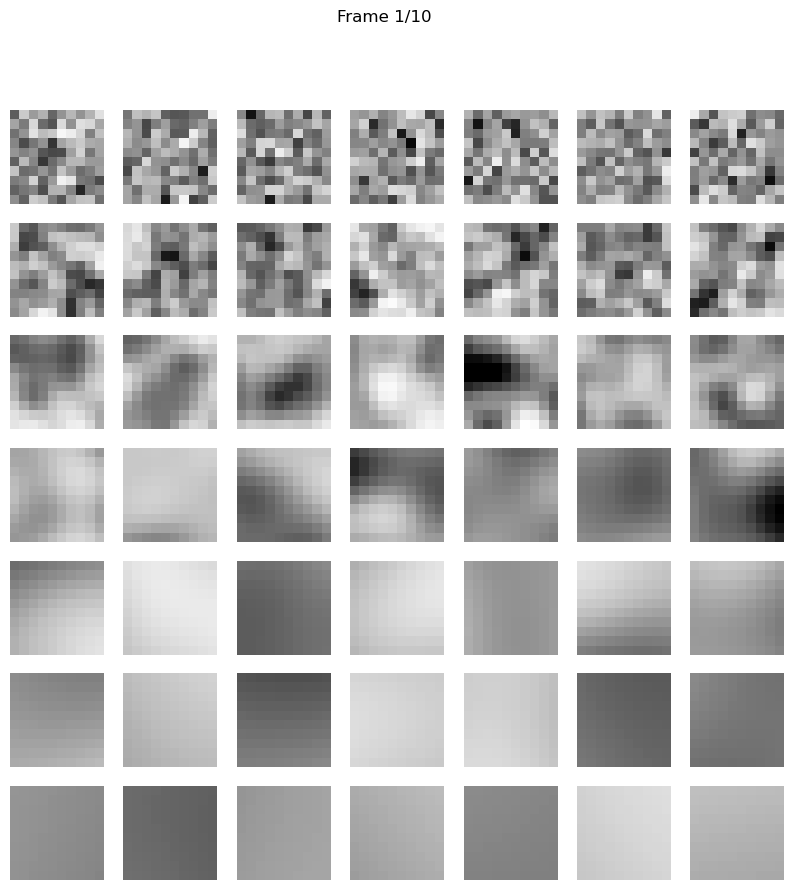

In [6]:

# Function to update the plot for each frame
def update(frame):
    fig = plt.gcf()  # Get the current figure
    #ax = fig.gca()  # Get the current axis
    for i in range(ax.shape[0]):
        for j in range(ax.shape[1]):
            ax[i,j].cla()
            ax[i,j].set_aspect('equal')
            ax[i,j].axis('off')
            ax[i,j].imshow(data_array[:,:,frame,0,i,j], cmap='Greys',vmin=-3,vmax=3)
    fig.suptitle(f'Frame {frame+1}/{N_t}')
# Initialize the figure
fig, ax = plt.subplots(N_L,N_T,figsize=(10,10))

# Create the animation
anim = FuncAnimation(fig, update, frames=N_t, interval=200)

# Show the animation using HTML
from IPython.display import HTML
HTML(anim.to_html5_video())